In [3]:
import pandas as pd
# Cargar el dataset
ruta = ruta = 'C:\\Users\\USUARIO\\Desktop\\UNIVERSIDAD\\5 semestre\\ANALSIS DE DATOS\\Anexo 4 - Dataset Red Wine Quality\\winequality-red.csv'

heart_df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(heart_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(heart_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(heart_df.describe())

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Crear un DataFrame simulado (si no tienes 'wine_data.csv')
# Aquí creamos un DataFrame con datos aleatorios
np.random.seed(42)
wine_df = pd.DataFrame({
    'fixed_acidity': np.random.rand(100),
    'volatile_acidity': np.random.rand(100),
    'citric_acid': np.random.rand(100),
    'residual_sugar': np.random.rand(100),
    'chlorides': np.random.rand(100),
    'free_sulfur_dioxide': np.random.rand(100),
    'total_sulfur_dioxide': np.random.rand(100),
    'density': np.random.rand(100),
    'ph': np.random.rand(100),
    'sulphates': np.random.rand(100),
    'alcohol': np.random.rand(100),
    'quality': np.random.randint(3, 9, size=100)  # Valores de calidad entre 3 y 8
})

# 2. Seleccionar características y variable objetivo
X = wine_df.drop('quality', axis=1)  # Todas las columnas excepto 'quality'
y = wine_df['quality']  # Variable objetivo

# 3. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}, {y_test.shape}")

# 4. Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)


Dimensiones del conjunto de entrenamiento: (90, 11), (90,)
Dimensiones del conjunto de prueba: (10, 11), (10,)
Matriz de confusión:
[[0 1 1 0 1]
 [2 1 0 0 0]
 [0 0 0 0 0]
 [0 0 2 0 0]
 [0 0 1 0 1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.50      0.50      0.50         2

    accuracy                           0.20        10
   macro avg       0.20      0.17      0.18        10
weighted avg       0.25      0.20      0.22        10



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packag

In [13]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
dt = DecisionTreeClassifier(random_state=42)

# Definir los parámetros a ajustar
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados de la búsqueda
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntuación: 0.2333333333333333


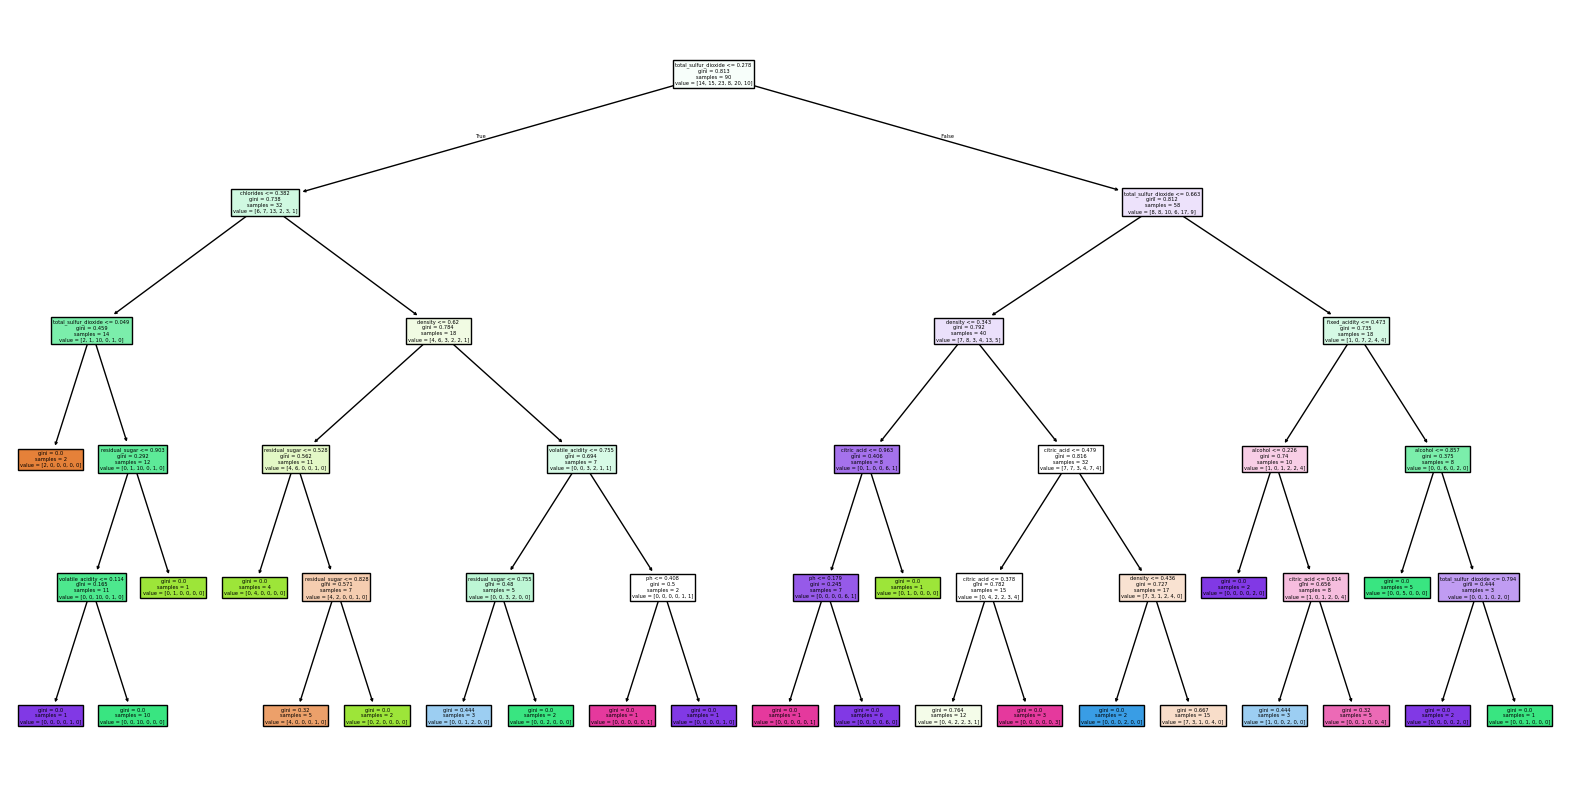

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X_train.columns)
plt.show()

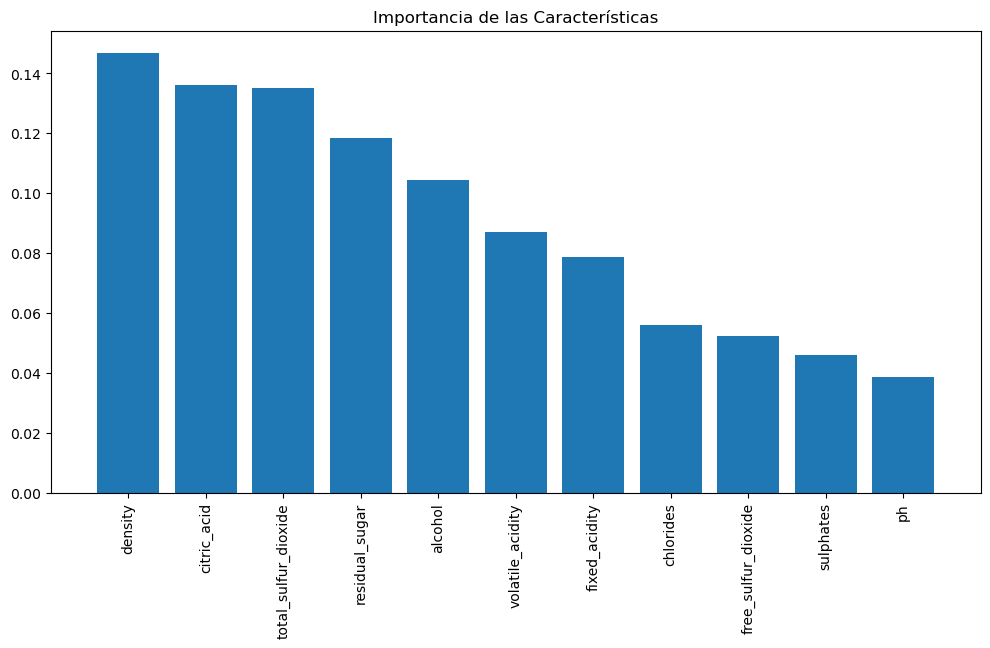

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tu modelo se llama 'model' y que 'X_train' es el conjunto de entrenamiento

# Obtener la importancia de las características
importancia = model.feature_importances_

# Crear un gráfico de barras
caracteristicas = X_train.columns  # Suponiendo que X_train es un DataFrame de pandas
indices = np.argsort(importancia)[::-1]  # Ordenar las características por importancia

# Visualizar
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train.shape[1]), caracteristicas[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Crear un nuevo modelo con poda (limitando la profundidad)
model_podado = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Entrenar el modelo
model_podado.fit(X_train, y_train)

# Evaluar el rendimiento
y_pred_podado = model_podado.predict(X_test)

# Generar las métricas de rendimiento
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusión (modelo podado):\n", confusion_matrix(y_test, y_pred_podado))
print("\nReporte de clasificación (modelo podado):\n", classification_report(y_test, y_pred_podado))

Matriz de confusión (modelo podado):
 [[0 0 1 0 1 1]
 [0 1 1 0 1 0]
 [0 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 0 0 0]]

Reporte de clasificación (modelo podado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0

    accuracy                           0.10        10
   macro avg       0.17      0.06      0.08        10
weighted avg       0.30      0.10      0.15        10



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packag